In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sfp_nsdsyn.two_dimensional_model as two_d
import sfp_nsdsyn.cross_validation_2d_model as cv2d
import warnings
import json
import itertools

# Load the JSON file
with open("../config.json", "r") as file:
    config = json.load(file)
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [2]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
dset='nsdsyn'
subj='subj01'
roi='V1'
vs='pRFsize'
max_epoch=30000
lr=0.0005
subj_list = ['subj01', 'subj02', 'subj03', 'subj04', 'subj05', 'subj06', 'subj07', 'subj08']
all_df = pd.DataFrame({})
for subj in subj_list:
    tmp = pd.read_csv(os.path.join(config['OUTPUT_DIR'],'sfp_model','cross_validation',f'{dset}',f'cvresults_bts-False_lr-{lr}_eph-{max_epoch}_sub-{subj}_roi-{roi}_vs-{vs}.h5'))
    tmp['sub'] = subj
    all_df = pd.concat([all_df, tmp], axis=0)

In [25]:
sample_df = all_df[['sub','fold','train_loss','test_loss','model_params']]
sample_df_long = sample_df.melt(id_vars=['sub','fold', 'model_params'], 
                                var_name='loss_type', 
                                value_name='loss')


In [36]:
model_df = pd.DataFrame({})
for row in sample_df_long.iterrows():
    tmp = eval(row[1]['model_params'])
    tmp['sub'] = row[1]['sub']
    tmp['fold'] = row[1]['fold']
    model_df = pd.concat([model_df, pd.DataFrame([tmp])], axis=0, ignore_index=True)
model_df

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,fold
0,2.606778,0.136002,0.269536,-0.079754,0.013391,-0.223100,-0.011469,0.090325,-0.017196,subj01,0
1,2.508506,0.168673,0.280315,-0.042529,-0.003422,-0.437740,0.108100,0.071711,-0.011660,subj01,1
2,2.565788,0.135240,0.289891,-0.072318,-0.005595,-0.321779,0.012715,0.080965,-0.017755,subj01,2
3,2.465230,0.156965,0.228159,-0.061110,0.009911,-0.269565,-0.001506,0.079379,-0.013847,subj01,3
4,2.637589,0.124118,0.284885,-0.087269,0.001227,-0.031919,-0.038711,0.077534,-0.016394,subj01,4
...,...,...,...,...,...,...,...,...,...,...,...
107,2.517470,0.212619,0.117576,0.125482,-0.025086,-0.189870,-0.158332,0.069112,-0.033125,subj08,2
108,2.496277,0.225213,0.132949,0.139327,-0.011916,-0.163753,-0.220906,0.074330,-0.024260,subj08,3
109,2.358188,0.201706,0.089064,0.117404,-0.037056,-0.038813,-0.228077,0.062257,-0.023187,subj08,4
110,2.316052,0.189166,0.098723,0.143776,-0.055608,-0.139806,-0.186613,0.070263,-0.034662,subj08,5


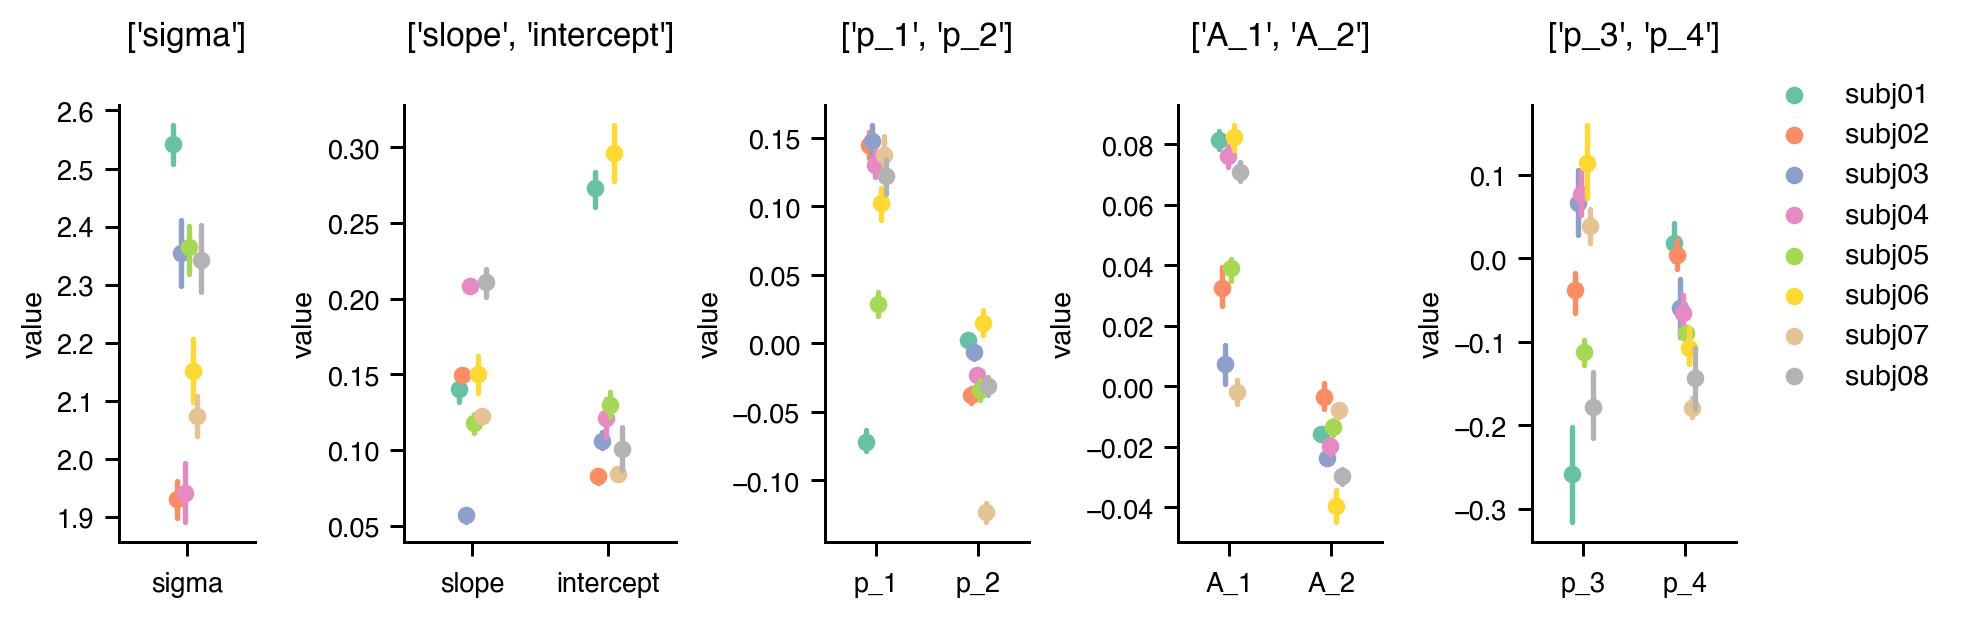

In [89]:
params_list = [['sigma'], ['slope', 'intercept'], ['p_1', 'p_2'], ['A_1', 'A_2'], ['p_3', 'p_4']]
cv2d.plot_model_params(model_df, params_list, save_path='model_params.png')

AttributeError: 'Series' object has no attribute 'precision'

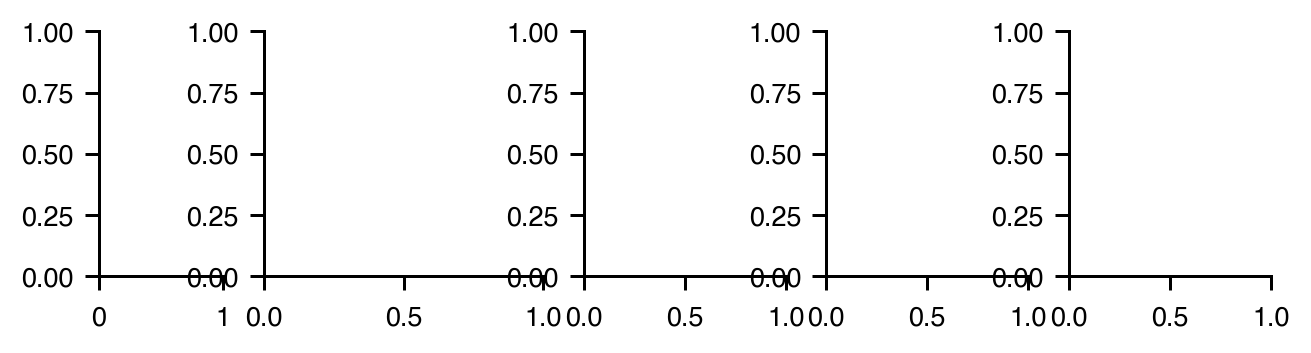

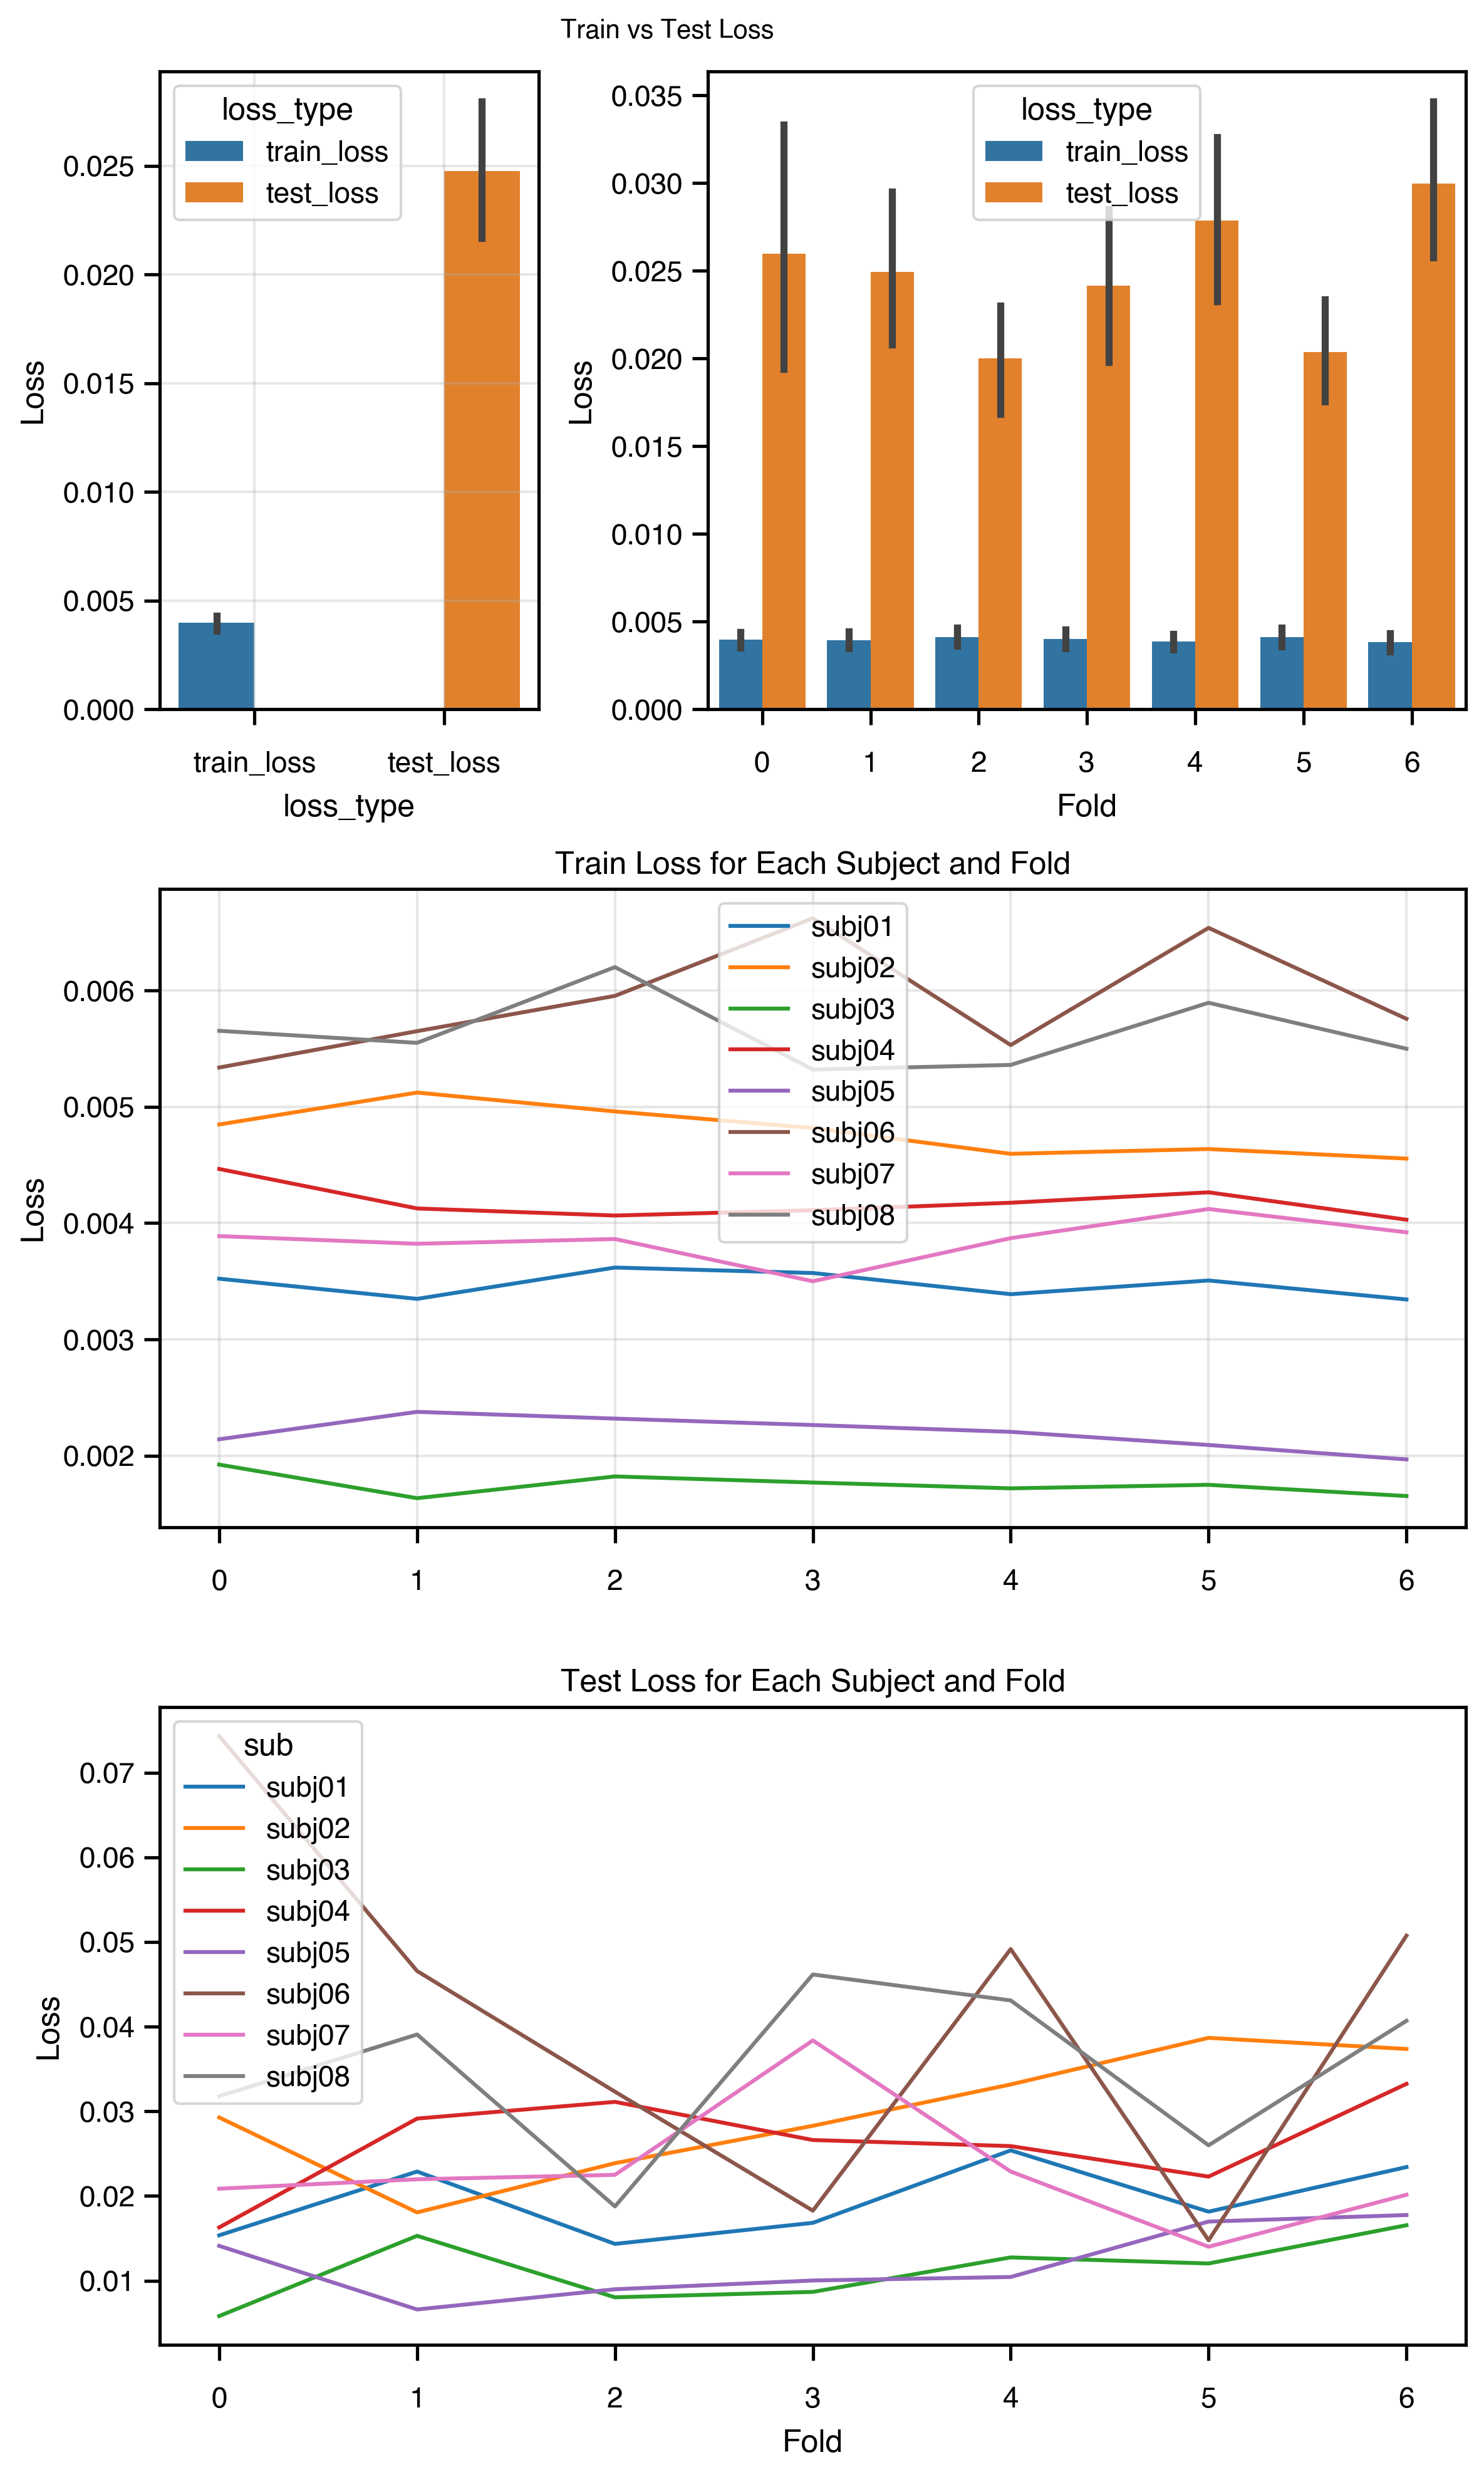

In [3]:
sample_df = all_df[['sub','fold','train_loss','test_loss','model_params']]
cv2d.plot_cv_results_group(sample_df, save_path='/Volumes/server/Projects/sfp_nsd/derivatives/figures/cross_validation/cv_results_group.png')